# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 
import seaborn as sns

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [3]:
data = pd.read_csv('weight-height.csv')
male_df = data[data["Gender"] == "Male"]
female_df = data[data["Gender"] == "Female"]

male_height_mean = male_df["Height"].mean()
male_height_sd = male_df.loc[:,"Height"].std()
male_weight_mean = male_df["Weight"].mean()
male_weight_sd = male_df.loc[:,"Weight"].std()
female_height_mean = female_df["Height"].mean()
female_height_sd = female_df.loc[:,"Height"].std()
female_weight_mean = female_df["Weight"].mean()
female_weight_sd = female_df.loc[:,"Weight"].std()


  

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007


male_height_mean
male_height_sd
male_weight_mean
male_weight_sd
female_height_mean
female_height_sd
female_weight_mean
female_weight_sd

19.022467805319028

#### Plot overlapping normalized histograms for male and female heights - use binsize = 
10, set alpha level so that overlap can be visualized


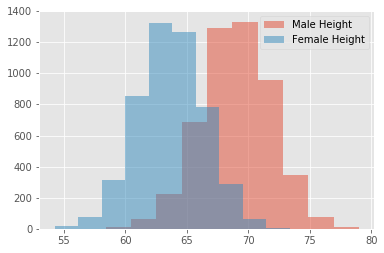

In [4]:
x = [male_df["Height"]]
y = [female_df["Height"]]

plt.hist(x, bins = 10, alpha=0.5, label = "Male Height")
plt.hist(y, bins = 10, alpha=0.5, label = "Female Height")
plt.legend(loc = "upper right")
plt.show()

In [5]:
# Record your observations - are these inline with your personal observations?



#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

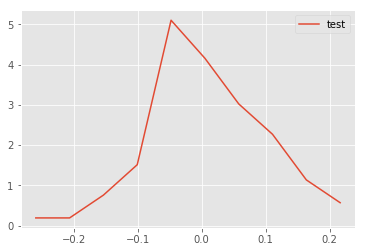

In [6]:
def density(x):
    
    n, bins = np.histogram(x, bins = 10, density = 1)
    
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
        
    return pdfx, pdfy




# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

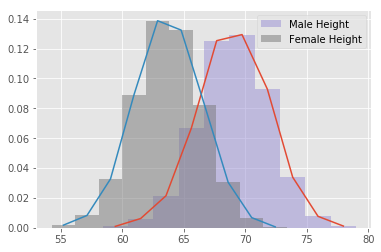

In [7]:
x = [male_df["Height"]]
y = [female_df["Height"]]

a, b = density([male_df["Height"]])
c,d = density([female_df["Height"]])
plt.plot(a,b)
plt.plot(c,d)

plt.hist(x, bins = 10, alpha=0.5, label = "Male Height", density = 1)
plt.hist(y, bins = 10, alpha=0.5, label = "Female Height", density = 1)
plt.legend(loc = "upper right")
plt.show()

#### Repeat above exerice for male and female weights

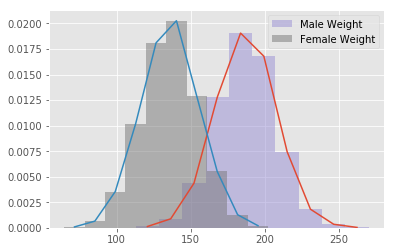

In [8]:
x = [male_df["Weight"]]
y = [female_df["Weight"]]

a, b = density([male_df["Weight"]])
c,d = density([female_df["Weight"]])
plt.plot(a,b)
plt.plot(c,d)

plt.hist(x, bins = 10, alpha=0.5, label = "Male Weight", density = 1)
plt.hist(y, bins = 10, alpha=0.5, label = "Female Weight", density = 1)
plt.legend(loc = "upper right")
plt.show()

#### Write your observations in the cell below.

In [9]:
# Record your observations - are these inline with your personal observations?


# So whats the takeaway when comparing male and female heights and weights 



#### Repeat Above experiments in seaborn and compare with your results. 

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


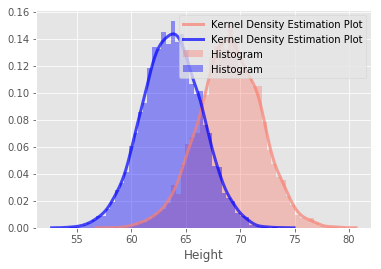

In [13]:
sns.distplot(male_df.Height, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "alpha": 0.4, 
                                  "color":  "salmon",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "salmon",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 })
sns.distplot(female_df.Height, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "alpha": 0.4, 
                                  "color":  "blue",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "blue",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 })

plt.show()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


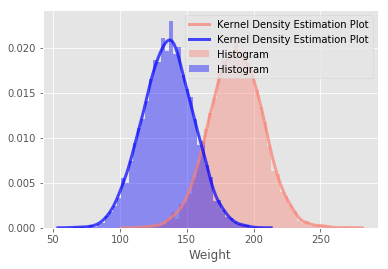

In [14]:
sns.distplot(male_df.Weight, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "alpha": 0.4, 
                                  "color":  "salmon",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "salmon",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 })
sns.distplot(female_df.Weight, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "alpha": 0.4, 
                                  "color":  "blue",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "blue",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 })

plt.show()

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.